In [20]:
# Importing the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Reading the dataset
dataset = pd.read_csv('Traffic.csv')

## EDA

In [3]:
dataset.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [4]:
# Getting columns of dataset
dataset.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [5]:
# Getting the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [9]:
# Transforming the time column
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%I:%M:%S %p').dt.time

In [10]:
dataset['Time'][:5]

0    00:00:00
1    00:15:00
2    00:30:00
3    00:45:00
4    01:00:00
Name: Time, dtype: object

In [11]:
# Descriptive Statistics 
dataset.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


## Data Visualization

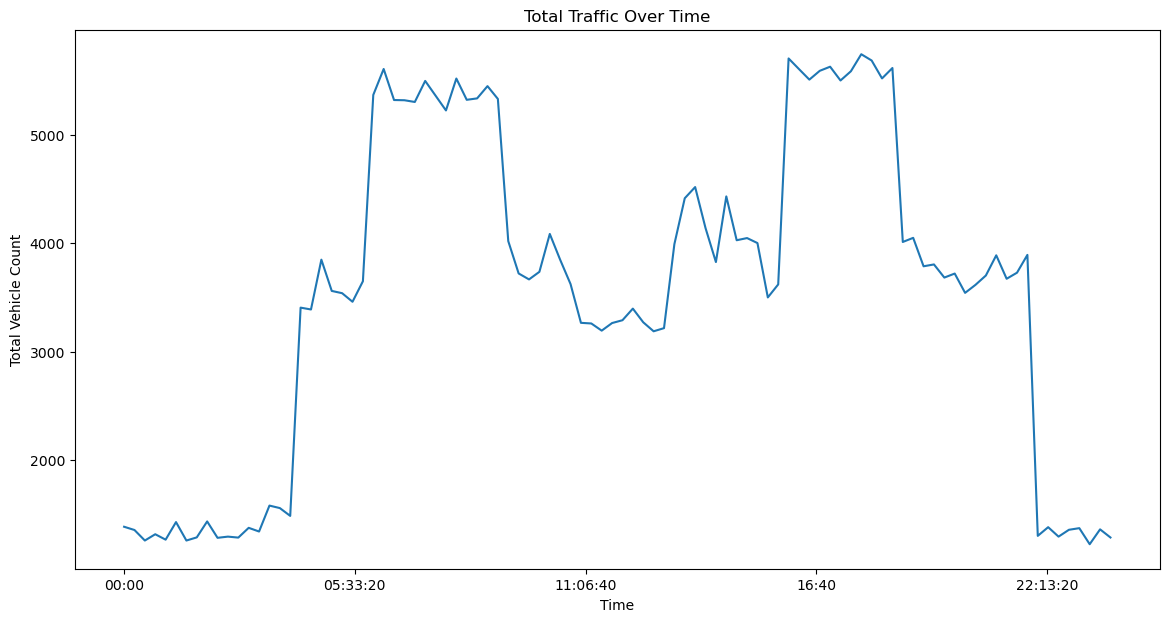

In [14]:
# Time Series Analysis - Traffic over time
plt.figure(figsize=(14, 7))
dataset.groupby('Time')['Total'].sum().plot()
plt.title('Total Traffic Over Time')
plt.xlabel('Time')
plt.ylabel('Total Vehicle Count')
plt.show()

<Figure size 1400x700 with 0 Axes>

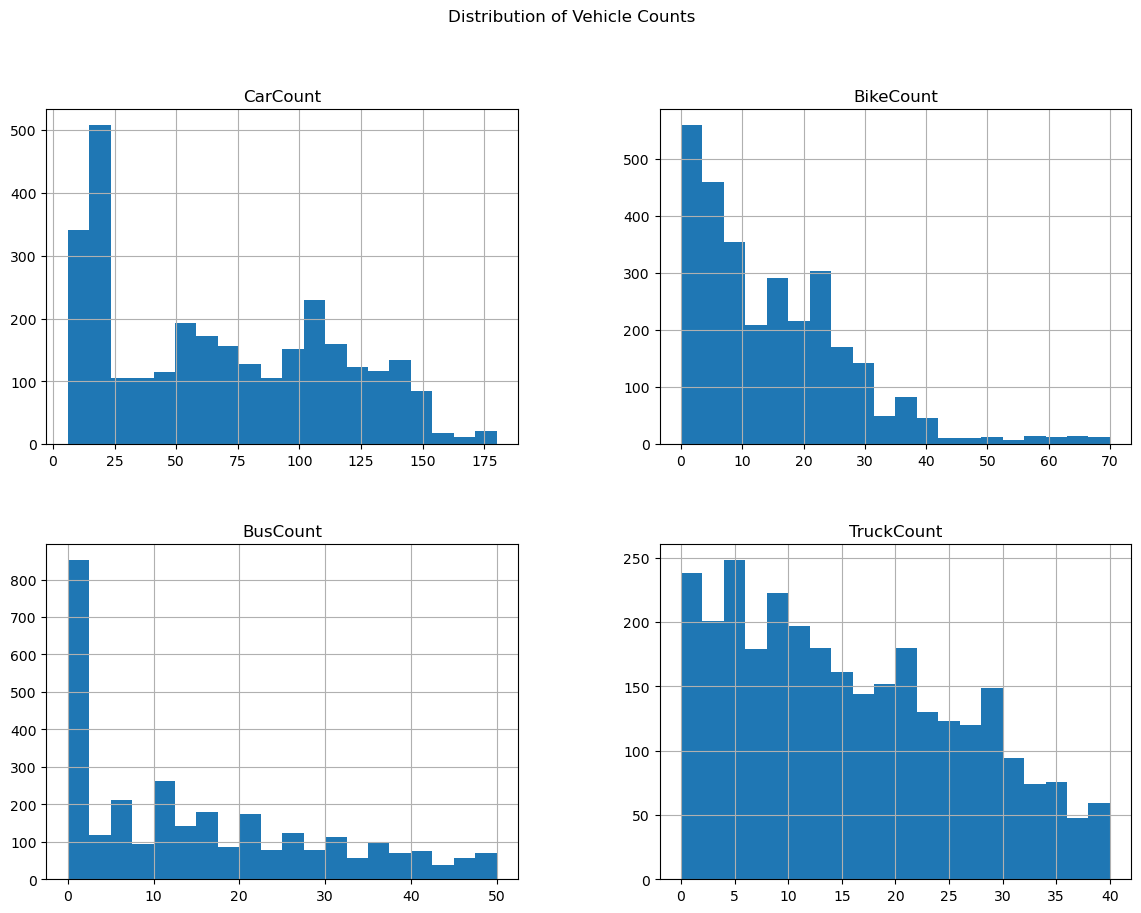

In [16]:
# Distribution of different vehicle counts
plt.figure(figsize=(14, 7))
dataset[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].hist(bins=20, layout=(2, 2), figsize=(14, 10))
plt.suptitle('Distribution of Vehicle Counts')
plt.show()

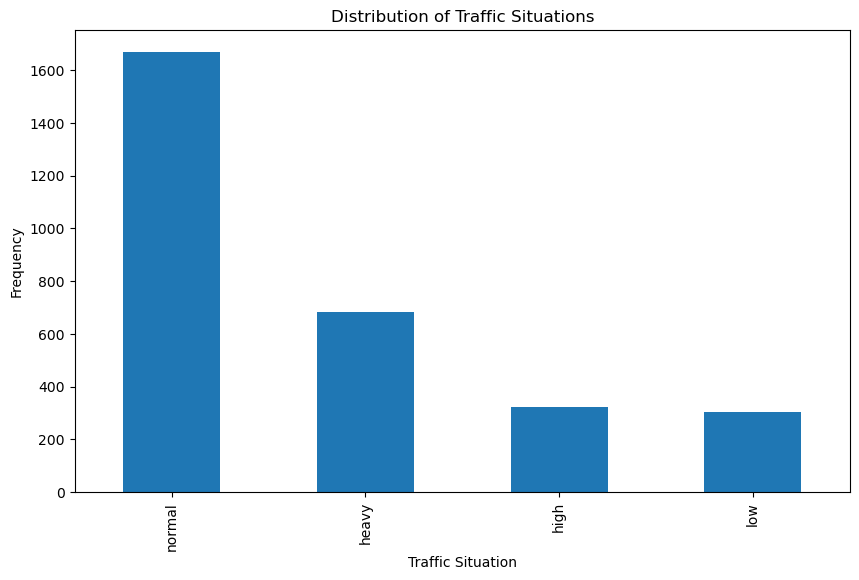

In [18]:
# Traffic Situation Distribution
plt.figure(figsize=(10, 6))
dataset['Traffic Situation'].value_counts().plot(kind='bar')
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Frequency')
plt.show()

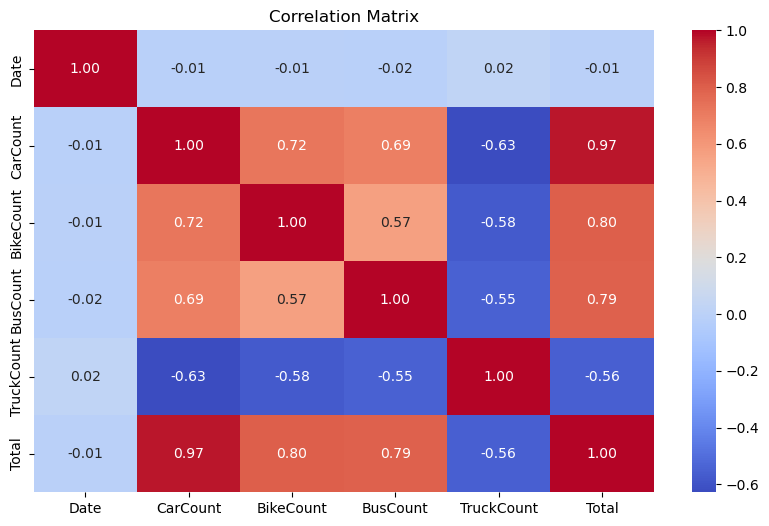

In [19]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Training and Evaluating the model

In [21]:
# Convert categorical variables into numerical ones
le = LabelEncoder()
dataset['Day of the week'] = le.fit_transform(dataset['Day of the week'])
dataset['Traffic Situation'] = le.fit_transform(dataset['Traffic Situation'])

In [22]:
# Extract hour and minute from Time and add as new features
dataset['Hour'] = dataset['Time'].apply(lambda x: x.hour)
dataset['Minute'] = dataset['Time'].apply(lambda x: x.minute)

# Dropping the original Time column after extraction
dataset = dataset.drop(columns=['Time'])

In [23]:
# Splitting features and target variable
X = dataset.drop(columns=['Traffic Situation'])  # All features except the target
y = dataset['Traffic Situation']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [28]:
# Train and evaluate models
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {score:.4f}")
    if score > best_score:
        best_score = score
        best_model = model

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8775
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 0.9899
Gradient Boosting Accuracy: 0.9966


In [29]:
print("\nBest Model:")
print(best_model)
print("\nClassification Report:")
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Best Model:
DecisionTreeClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00       340

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596

